<a href="https://colab.research.google.com/github/sosboy888/HandWrittenDigitAnalysis/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

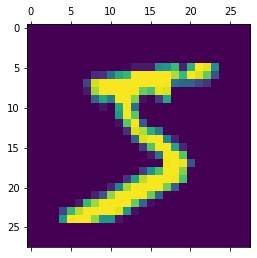

In [5]:
plt.matshow(X_train[0])

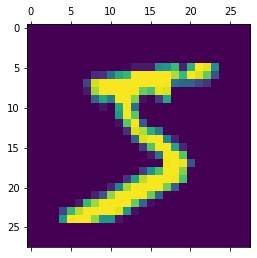

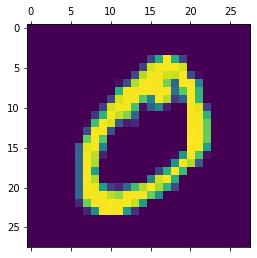

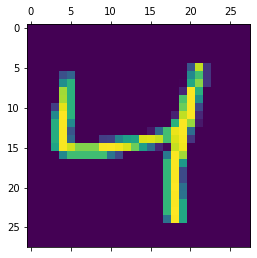

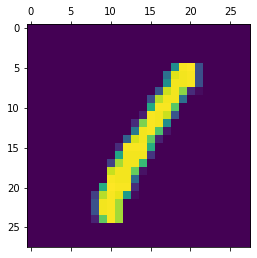

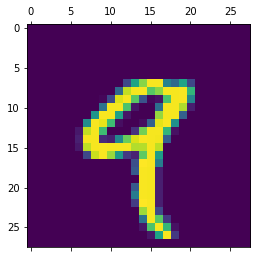

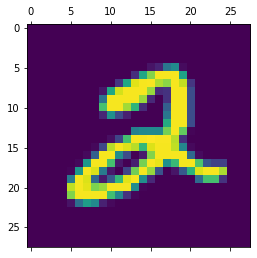

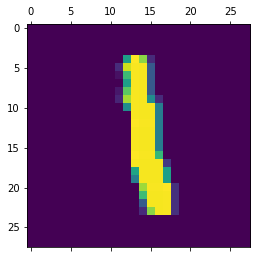

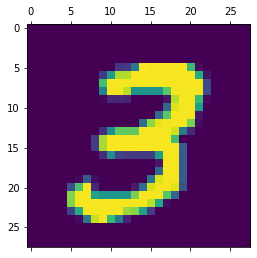

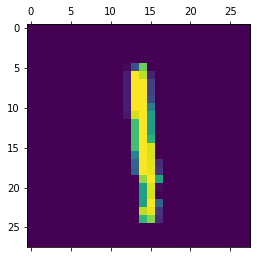

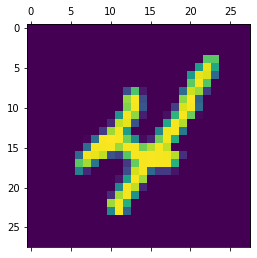

In [6]:
for i in range(10):
  plt.matshow(X_train[i])

In [7]:
X_flattened_train=X_train.reshape(len(X_train),28*28)
X_flattened_test=X_test.reshape(len(X_test),28*28)
X_flattened_train.shape
X_flattened_test.shape

(10000, 784)

In [12]:
from keras.layers import Dense
from keras.layers import Dropout
model=keras.Sequential()
model.add(Dense(100,input_shape=(784,),activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss=keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [13]:
model.fit(X_flattened_train,y_train,epochs=10,validation_data=(X_flattened_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2276 - accuracy: 0.6244 - val_loss: 0.4115 - val_accuracy: 0.8818
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6384 - accuracy: 0.7941 - val_loss: 0.3675 - val_accuracy: 0.8911
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5702 - accuracy: 0.8163 - val_loss: 0.3440 - val_accuracy: 0.8998
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5438 - accuracy: 0.8264 - val_loss: 0.2997 - val_accuracy: 0.9115
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4983 - accuracy: 0.8412 - val_loss: 0.2935 - val_accuracy: 0.9115
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4987 - accuracy: 0.8414 - val_loss: 0.2794 - val_accuracy: 0.9171
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4528 - accuracy: 0.8580 - val_loss: 0.2747 - val_accuracy:

In [14]:
y_predicted=model.predict(X_flattened_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.9227
[0.2571573257446289, 0.9226999878883362]
Predicted value #07
Actual value #07
Predicted value #12
Actual value #12
Predicted value #21
Actual value #21
Predicted value #30
Actual value #30
Predicted value #44
Actual value #44
Predicted value #51
Actual value #51
Predicted value #64
Actual value #64
Predicted value #79
Actual value #79
Predicted value #86
Actual value #85
Predicted value #99
Actual value #99


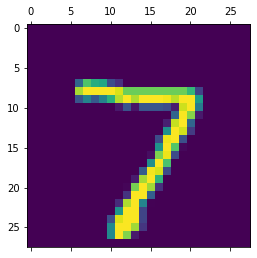

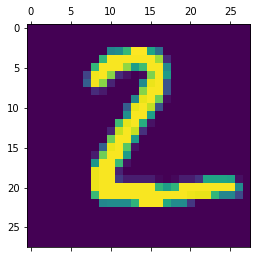

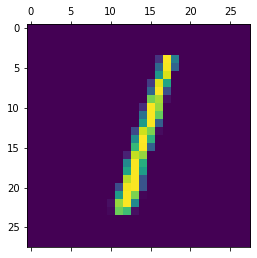

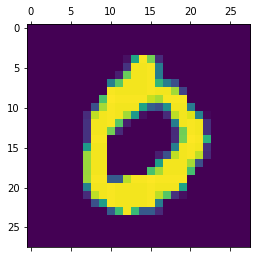

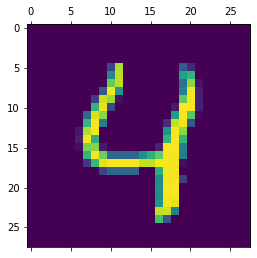

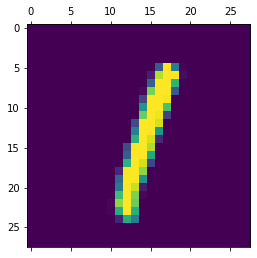

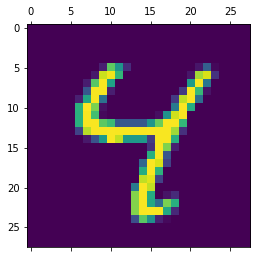

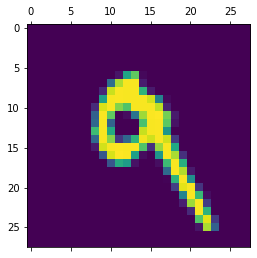

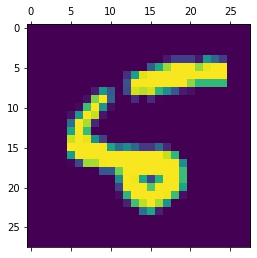

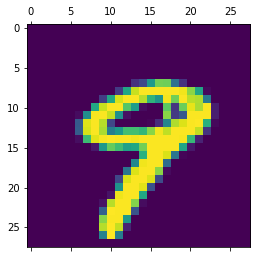

In [15]:
results=model.evaluate(X_flattened_test,y_test,batch_size=128)
print(results)
for i in range(10):
  print("Predicted value #"+str(i)+str(np.argmax(y_predicted[i])))
  print("Actual value #"+str(i)+str(y_test[i]))
  plt.matshow(X_test[i])